In [ ]:
# === Block 1: import ===
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import rc
from IPython.display import HTML

# visualisation
rc('animation', html='jshtml')

print("Loaded")

Loaded


In [ ]:
# === Block 2: parameters ===

# 1. The World
g = 9.8       # g (m/s^2)
L = 1.0       # length of rod (m)
dt = 0.02     # simulation gap (s)
T_max = 5    # simulation time

# 2. Initial State
theta_0 = -1.0 # initial radian
x_0 = 0.0     # initial position

# 3. PID Tuning
Kp = 2000.0     # P (Spring)
Kd = 17.0      # D (Damper)

print(f"parameters setting done")

parameters setting done


In [ ]:
# === Block 3 simulation cycle ===

# initial state
theta = theta_0
theta_dot = 0.0
x = x_0
x_dot = 0.0

history_t = []
history_theta = []
history_x = []
history_u = []

steps = int(T_max / dt)

# === position control parameters ===
# Priority: angle control (balance)
Kp_x = 1.0
Kd_x = 4.0

for i in range(steps):
    # --- Controller ---

    # A. Balance
    u_balance = Kp * theta + Kd * theta_dot

    # B. Position
    u_position = Kp_x * (0 - x) + Kd_x * (0 - x_dot)

    # C. Main
    u = u_balance + u_position

    # max force
    u = np.clip(u, -50, 50)

    # --- Physics ---
    theta_ddot = -(g / L) * np.sin(theta) - (1 / L) * u * np.cos(theta)

    # --- state update ---
    theta_dot += theta_ddot * dt
    x_dot += u * dt

    theta += theta_dot * dt
    x += x_dot * dt

    history_t.append(i * dt)
    history_theta.append(theta)
    history_x.append(x)
    history_u.append(u)

print("simulation done!")

simulation done!


In [ ]:
# === Block 4 visualisation ===

skip = 5  # draw 1 step for every 5 steps

# create plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(-5, 5)
ax.set_ylim(-1, 2)
ax.set_aspect('equal')
ax.grid(True)
ax.set_title(f'Inverted Pendulum (Speed x{skip})')

# elements
ground, = ax.plot([-10, 10], [0, 0], 'k-', lw=2)
cart, = ax.plot([], [], 's', markersize=25, color='blue')
rod, = ax.plot([], [], 'o-', lw=4, markersize=10, color='red')
info_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

# initialisation
def init():
    cart.set_data([], [])
    rod.set_data([], [])
    info_text.set_text('')
    return cart, rod, info_text

# update
def animate(i):
    # get history data
    cx = history_x[i]
    th = history_theta[i]

    px = cx + L * np.sin(th)
    py = L * np.cos(th)

    cart.set_data([cx], [0])
    rod.set_data([cx, px], [0, py])

    # show time
    info_text.set_text(f'Time: {history_t[i]:.1f}s\nPos: {cx:.2f}m')
    return cart, rod, info_text

# get

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=range(0, len(history_t), skip), # skip
                               interval=dt*1000*skip, # play speed higher
                               blit=True)

plt.close()
anim

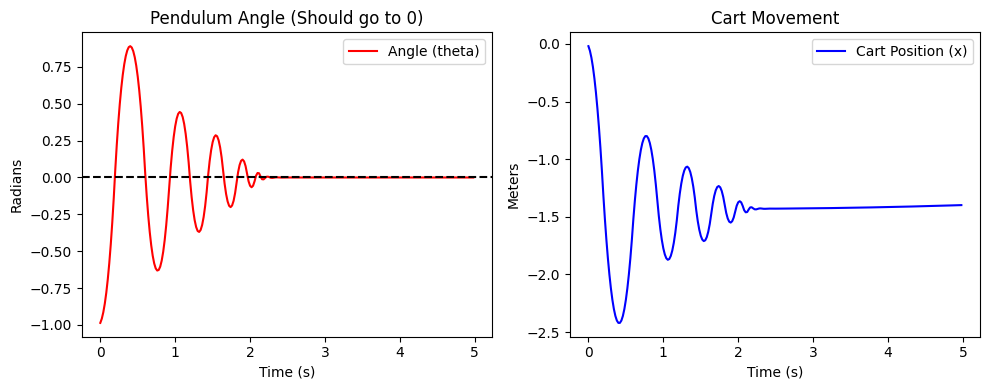

In [ ]:
# === Block 5: plotting ===
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history_t, history_theta, 'r', label='Angle (theta)')
plt.axhline(0, color='k', linestyle='--')
plt.title('Pendulum Angle (Should go to 0)')
plt.xlabel('Time (s)')
plt.ylabel('Radians')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_t, history_x, 'b', label='Cart Position (x)')
plt.title('Cart Movement')
plt.xlabel('Time (s)')
plt.ylabel('Meters')
plt.legend()

plt.tight_layout()
plt.show()